# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data collection

In [3]:
#original file was in utf-16... so coverted to utf-8
df = pd.read_csv("../data/encoded-laptop_price.csv")

In [4]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Data processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.shape

(1303, 13)

In [7]:
#check if there are null values
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
#check if duplicated values are there
df.duplicated().sum()

0

# Data cleaning & Exploratory data analysis

In [9]:
# laptop id is mot required
df.drop(columns=['laptop_ID'],inplace=True)

In [10]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Column: 'Company'

In [11]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='Company'>

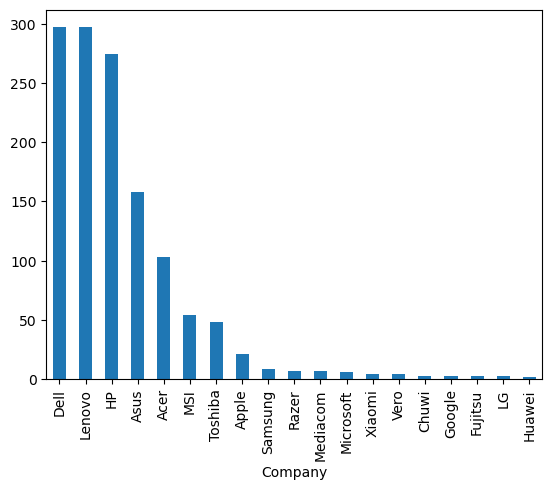

In [12]:
df['Company'].value_counts().plot(kind='bar')

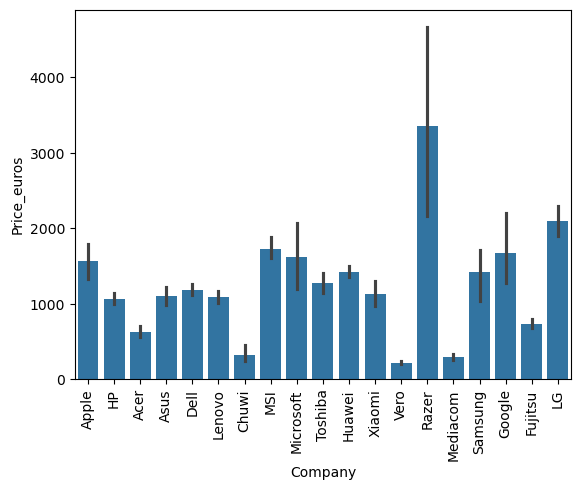

In [13]:
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

### Column: 'Product'

In [14]:
df['Product'].value_counts()

Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64

<Axes: xlabel='Product'>

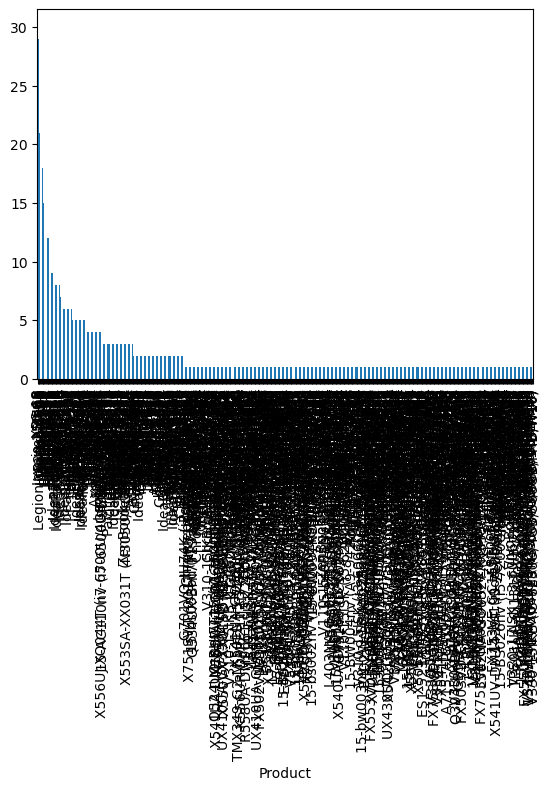

In [15]:
df['Product'].value_counts().plot(kind='bar')

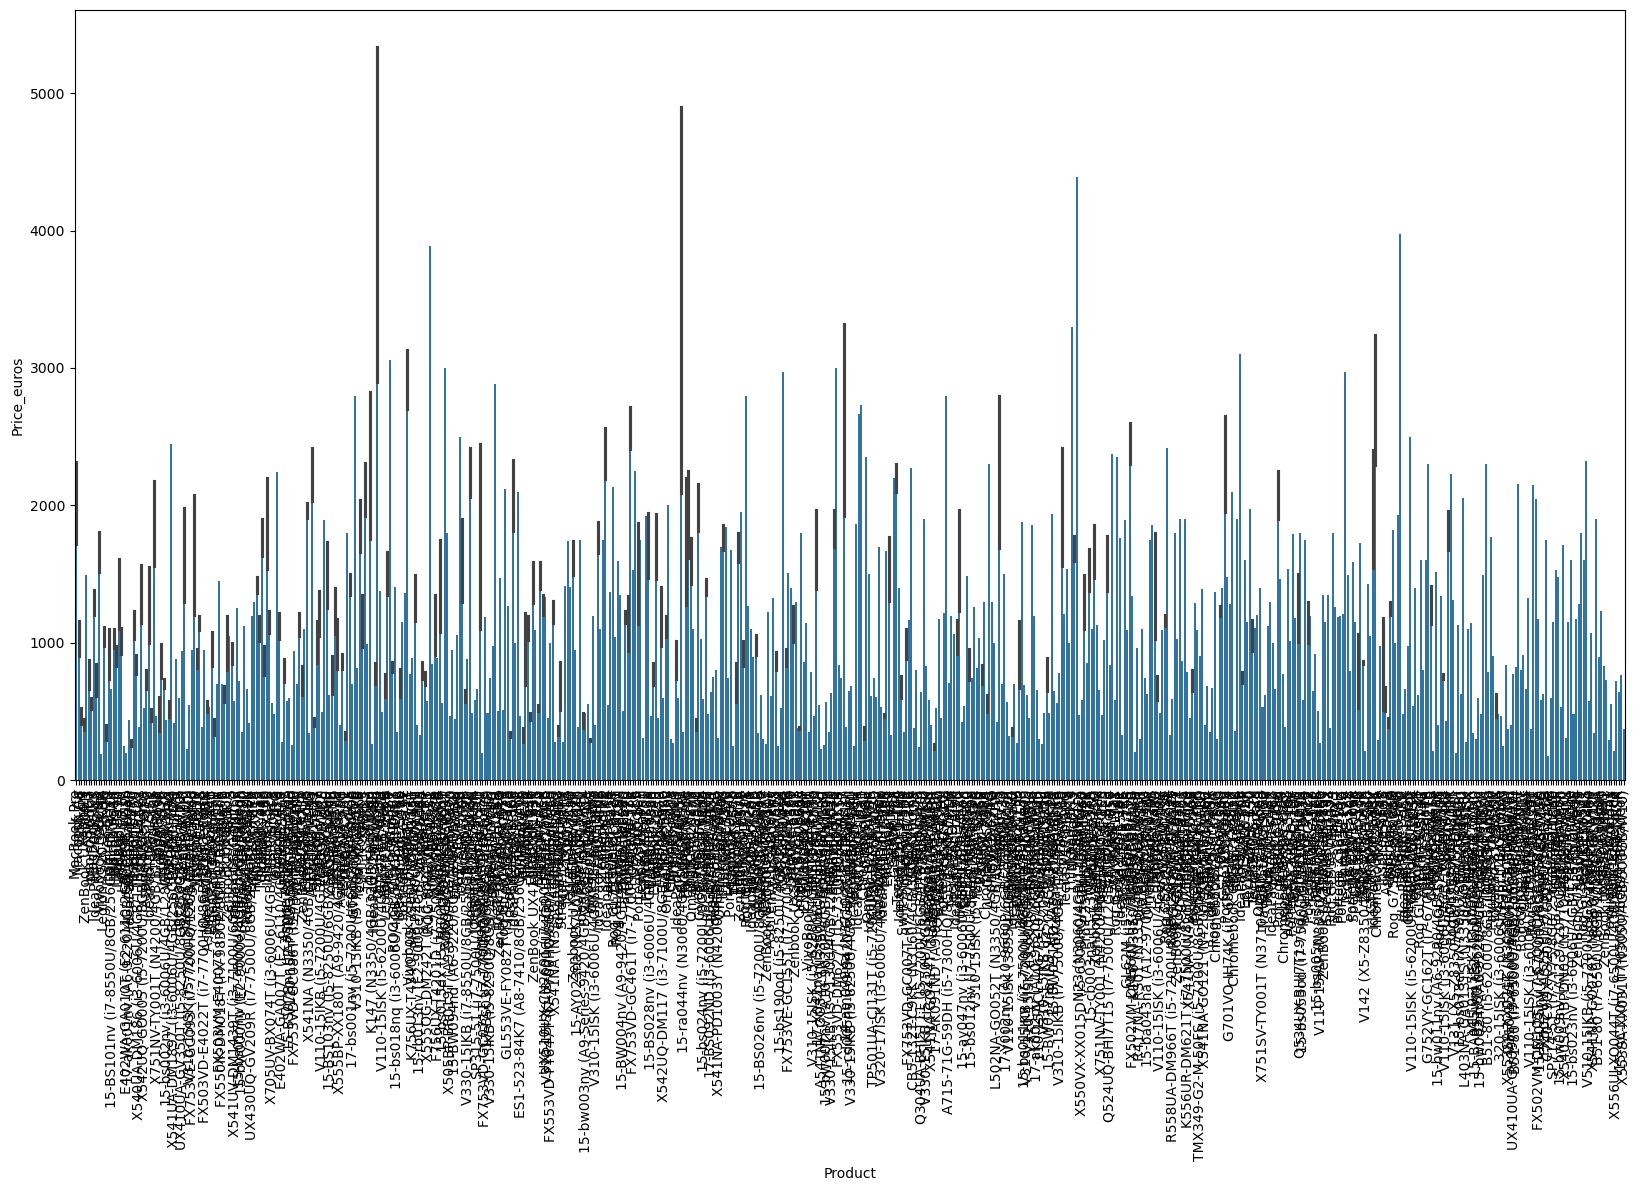

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Product'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [17]:
df.drop(columns=['Product'],inplace=True)

### Column: 'TypeName'

In [18]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

<Axes: xlabel='TypeName'>

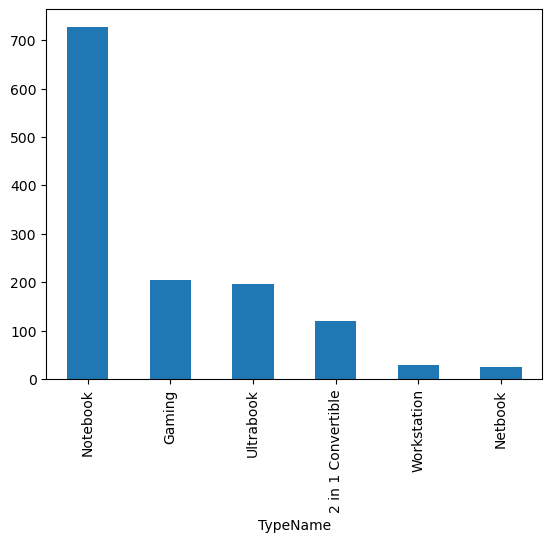

In [19]:
df['TypeName'].value_counts().plot(kind='bar')

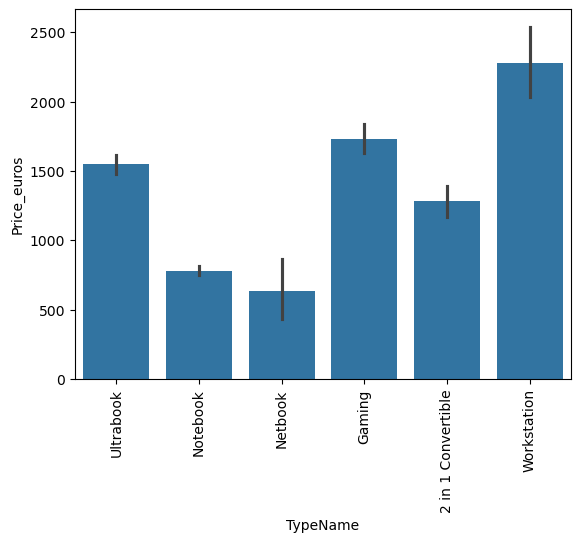

In [20]:
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

### Column: 'Inches' & 'ScreenResolution'

In [21]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [22]:
# forming a new column to check if have touchscreen
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [23]:
df['TouchScreen'].value_counts()

TouchScreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='TouchScreen', ylabel='Price_euros'>

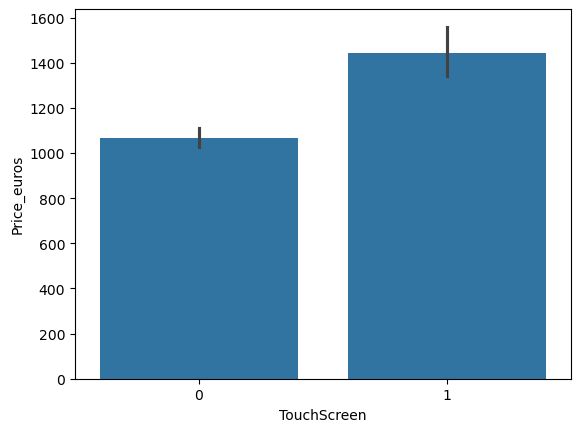

In [24]:
sns.barplot(x=df['TouchScreen'],y=df['Price_euros'])

In [25]:
# checking if have IPS panel
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [26]:
df['IPS'].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='IPS', ylabel='Price_euros'>

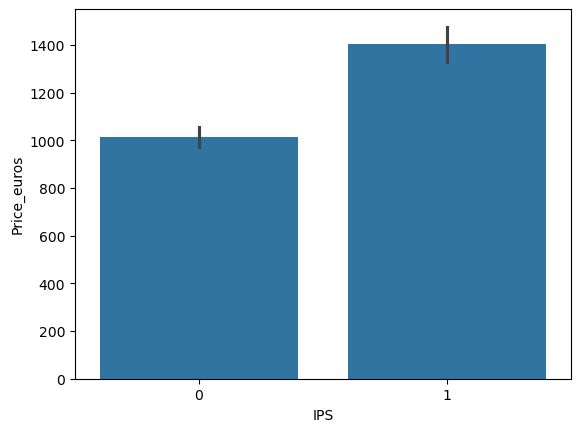

In [27]:
sns.barplot(x=df['IPS'],y=df['Price_euros'])

In [28]:
# checking resolution
new = df['ScreenResolution'].str.split('x',expand=True)

In [29]:
df['x_res'] = new[0]
df['y_res'] = new[1]

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [31]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [32]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,2560,1600


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_euros       1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   object 
 14  y_res             1303 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 152.8+ KB


In [34]:
df['x_res'] = df['x_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_euros       1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(9)
memory usage: 142.6+ KB


In [36]:
df.corr(numeric_only=True)['Price_euros']

Inches         0.068197
Price_euros    1.000000
TouchScreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price_euros, dtype: float64

In [37]:
#calculating pixels per inch
df['PPI'] = ((df['x_res']**2)+(df['y_res']**2))**0.5/df['Inches']

In [38]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,x_res,y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,2560,1600,226.983005


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_euros       1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
 15  PPI               1303 non-null   float64
dtypes: float64(3), int32(2), int64(2), object(

In [40]:
# drop unnecessary columns
df.corr(numeric_only=True)['Price_euros']

Inches         0.068197
Price_euros    1.000000
TouchScreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
PPI            0.473487
Name: Price_euros, dtype: float64

In [41]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [42]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,x_res,y_res,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,2560,1600,226.983005


In [43]:
df.drop(columns=['x_res','y_res','Inches'],inplace=True)

In [44]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005


### Column: 'Cpu'

In [45]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [46]:
df['CPU brand'] = df['Cpu'].apply(lambda x:" ".join(x.split()[:3]))

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5


In [48]:
def fetch_processor(text):
    if text=='Intel Core i5' or text=='Intel Core i7' or text=='Intel Core i3':
        return text
    elif text.split()[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return "AMD Processor"

In [49]:
df['CPU brand'] = df['CPU brand'].apply(fetch_processor)

In [50]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand
1139,HP,Ultrabook,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.88kg,2171.72,0,0,141.211998,Intel Core i7
200,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.65kg,1845.00,0,1,282.423996,Intel Core i7
529,Dell,Notebook,Intel Core i5 7440HQ 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.9kg,1377.00,0,0,141.211998,Intel Core i5
397,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.9kg,938.00,0,1,157.350512,Intel Core i5
894,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,16GB,512GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43kg,2649.00,0,1,254.671349,Intel Core i7
218,Dell,Ultrabook,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,1149.00,0,0,157.350512,Intel Core i5
10,HP,Notebook,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,393.90,0,0,100.454670,Intel Core i5
535,Dell,Notebook,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93kg,1369.00,0,0,141.211998,Intel Core i7
948,Dell,Notebook,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,659.00,0,0,106.113062,Intel Core i3
1175,Asus,Notebook,Intel Core i3 7100U 2.4GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,2kg,769.00,0,0,157.350512,Intel Core i3


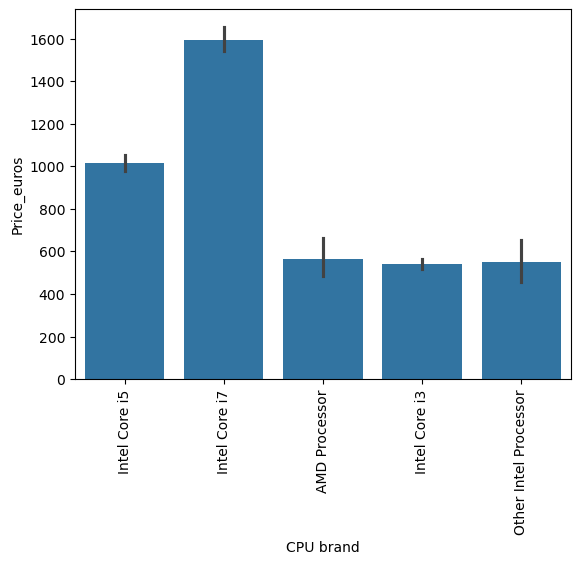

In [51]:
sns.barplot(x=df['CPU brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df['CPU clock speed'] = df['Cpu'].apply(lambda x:' '.join(x.split()[-1:]))

In [53]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand,CPU clock speed
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5,2.3GHz
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5,1.8GHz
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5,2.5GHz
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7,2.7GHz
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5,3.1GHz


In [54]:
df['CPU clock speed'] = df['CPU clock speed'].str.replace('GHz','')

In [55]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand,CPU clock speed
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5,2.3
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5,1.8
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5,2.5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7,2.7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5,3.1


In [56]:
df.drop(columns=['Cpu'],inplace=True)

In [57]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand,CPU clock speed
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5,2.3
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5,1.8
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5,2.5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7,2.7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5,3.1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   TypeName         1303 non-null   object 
 2   Ram              1303 non-null   object 
 3   Memory           1303 non-null   object 
 4   Gpu              1303 non-null   object 
 5   OpSys            1303 non-null   object 
 6   Weight           1303 non-null   object 
 7   Price_euros      1303 non-null   float64
 8   TouchScreen      1303 non-null   int64  
 9   IPS              1303 non-null   int64  
 10  PPI              1303 non-null   float64
 11  CPU brand        1303 non-null   object 
 12  CPU clock speed  1303 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 132.5+ KB


In [59]:
df.sample(20)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand,CPU clock speed
156,Lenovo,2 in 1 Convertible,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.74kg,629.00,1,1,157.350512,Intel Core i3,2.4
592,Dell,2 in 1 Convertible,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.00,1,0,135.094211,Other Intel Processor,1.0
500,Asus,Netbook,4GB,64GB Flash Storage,Intel HD Graphics 500,Windows 10 S,1.2kg,340.00,0,0,135.094211,Other Intel Processor,1.1
802,Dell,Ultrabook,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1499.00,0,0,165.632118,Intel Core i5,2.5
486,Dell,Workstation,16GB,512GB SSD,Nvidia Quadro M620,Windows 10,2.17kg,2338.00,0,1,141.211998,Intel Core i7,2.7
315,Dell,Notebook,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.33kg,844.00,0,0,141.211998,Intel Core i5,1.6
635,Asus,Notebook,8GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99kg,906.62,0,0,141.211998,Intel Core i5,2.5
205,Lenovo,Gaming,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,1398.00,0,0,141.211998,Intel Core i7,2.8
397,Lenovo,Notebook,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.9kg,938.00,0,1,157.350512,Intel Core i5,2.5
29,HP,Notebook,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg,896.00,0,0,127.335675,Intel Core i5,1.6


In [60]:
 df['CPU clock speed'] = df['CPU clock speed'].astype(float)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   TypeName         1303 non-null   object 
 2   Ram              1303 non-null   object 
 3   Memory           1303 non-null   object 
 4   Gpu              1303 non-null   object 
 5   OpSys            1303 non-null   object 
 6   Weight           1303 non-null   object 
 7   Price_euros      1303 non-null   float64
 8   TouchScreen      1303 non-null   int64  
 9   IPS              1303 non-null   int64  
 10  PPI              1303 non-null   float64
 11  CPU brand        1303 non-null   object 
 12  CPU clock speed  1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


### Column: 'Ram'

In [62]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [63]:
df['Ram'] = df['Ram'].astype(int)

In [64]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand,CPU clock speed
53,HP,Notebook,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49kg,1103.00,0,0,165.632118,Intel Core i7,1.8
770,Dell,Notebook,16,256GB SSD,AMD Radeon R7 M445,Windows 10,2.3kg,1181.27,0,0,141.211998,Intel Core i7,2.7
1135,Lenovo,Notebook,16,1.0TB Hybrid,AMD Radeon R7 M360,Windows 10,2.5kg,1099.00,0,0,141.211998,Intel Core i7,2.5
1251,HP,Notebook,4,500GB HDD,AMD Radeon R4 Graphics,Windows 10,1.86kg,399.00,0,0,100.454670,AMD Processor,2.5
710,Lenovo,Gaming,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,1249.00,0,1,141.211998,Intel Core i7,2.8


<Axes: xlabel='Ram', ylabel='Price_euros'>

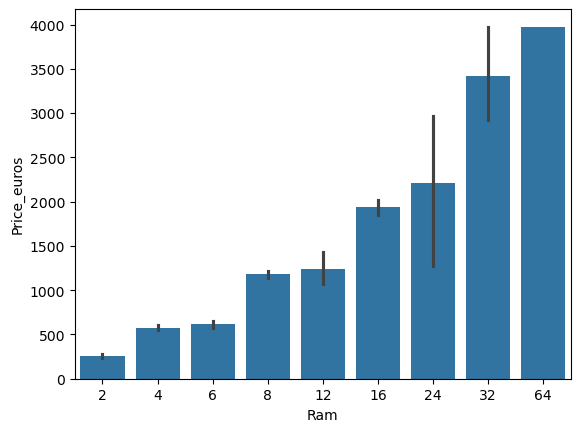

In [65]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])

In [66]:
df['Ram'].value_counts()

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

<Axes: xlabel='Ram'>

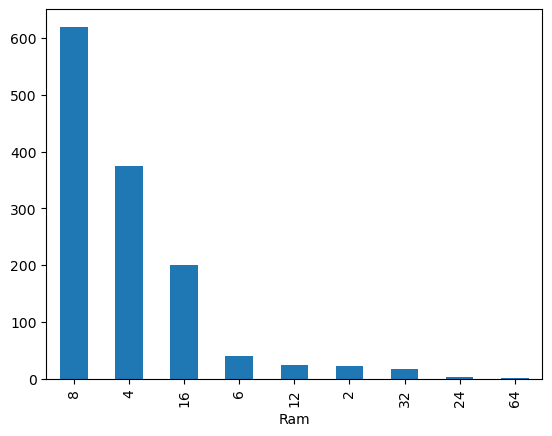

In [67]:
df['Ram'].value_counts().plot(kind='bar')

### Column: 'Memory'

In [68]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [69]:
# splitting the column into HDD SSD Flash Hybrid
df['Memory'] = df['Memory'].astype(str).replace(r'\.0','',regex=True)
# removing word GB TB and make all value unit as GB
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')

# split by + and form a separate dataframe named as new
new = df['Memory'].str.split('+',n=1,expand=True)

# take first one after splitting and remove leading and trailing whitespace
df['first'] = new[0]
df['first'] = df['first'].str.strip()

# take second
df['second'] = new[1]

#checking for HDD,SSD,Flash,Hybrid present in first
df['Layer1HDD'] = df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)

#extracting data from first
df['first'] = df['first'].str.findall(r'(\d+\.?\d+)').apply(lambda x:','.join(map(str,x)))
df['first'] = df['first'].replace('','0')

#if only first is present then no need of second, filling those by 0
df.fillna({'second':"not applicable"},inplace=True)

#checking for HDD,SSD,Flash,Hybrid present in second
df['Layer2HDD'] = df['second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)

#extracting data from second
df['second'] = df['second'].str.findall(r'(\d+\.?\d+)').apply(lambda x:','.join(map(str,x)))
df['second'] = df['second'].replace('','0')

# type conversion for values written in first and second
df['first'] = df['first'].astype(float)
df['second'] = df['second'].astype(int)

# finally creating columns and drop unnecessary columns
df['HDD'] = (df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD'] = (df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid'] = (df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'])

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

In [70]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand,CPU clock speed,HDD,SSD,Hybrid,Flash_Storage
579,Dell,Notebook,8,256 SSD,AMD Radeon R5 M430,Linux,2.2kg,749.01,0,0,141.211998,Intel Core i7,2.7,0.0,256.0,0.0,0.0
714,Dell,Notebook,16,512 SSD,Intel HD Graphics 620,Windows 10,1.93kg,1426.66,0,0,141.211998,Intel Core i5,2.6,0.0,512.0,0.0,0.0
187,Lenovo,Gaming,8,256 SSD,Nvidia GeForce GTX 1050,No OS,2.4kg,779.00,0,1,141.211998,Intel Core i5,2.5,0.0,256.0,0.0,0.0
34,Apple,Ultrabook,8,256 Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35kg,998.00,0,0,127.677940,Intel Core i5,1.6,0.0,0.0,0.0,256.0
1230,Lenovo,Netbook,16,512 SSD,Intel HD Graphics 520,Windows 10,1.3kg,1650.00,1,1,176.232574,Intel Core i7,2.5,0.0,512.0,0.0,0.0


In [71]:
df.drop(columns=['Memory'],inplace=True)

In [72]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand,CPU clock speed,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5,2.3,0.0,128.0,0.0,0.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5,1.8,0.0,0.0,0.0,128.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5,2.5,0.0,256.0,0.0,0.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7,2.7,0.0,512.0,0.0,0.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5,3.1,0.0,256.0,0.0,0.0


In [73]:
df.corr(numeric_only=True)['Price_euros']

Ram                0.743007
Price_euros        1.000000
TouchScreen        0.191226
IPS                0.252208
PPI                0.473487
CPU clock speed    0.430293
HDD               -0.096441
SSD                0.670725
Hybrid             0.007989
Flash_Storage     -0.040511
Name: Price_euros, dtype: float64

In [74]:
# drop hybrid as is doesn't have much correlation
df.drop(columns=['Hybrid'],inplace=True)

In [75]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand,CPU clock speed,HDD,SSD,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5,2.3,0.0,128.0,0.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5,1.8,0.0,0.0,128.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5,2.5,0.0,256.0,0.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7,2.7,0.0,512.0,0.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5,3.1,0.0,256.0,0.0


### Column: 'Gpu'

In [76]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [77]:
df['Gpu'] = df['Gpu'].apply(lambda x:x.split()[0])

In [78]:
df['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [79]:
df = df[df['Gpu']!= 'ARM']

In [80]:
df['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

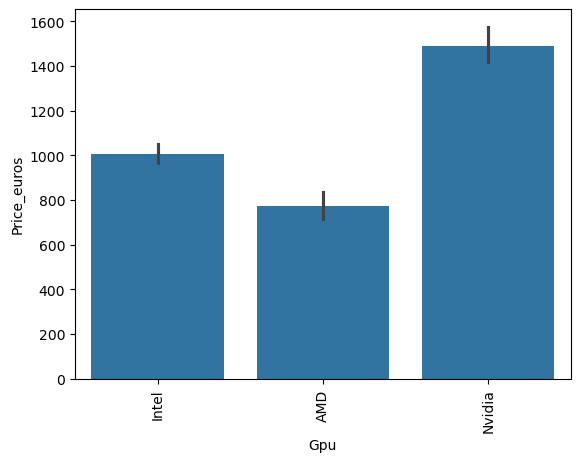

In [81]:
sns.barplot(x=df['Gpu'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [82]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand,CPU clock speed,HDD,SSD,Flash_Storage
0,Apple,Ultrabook,8,Intel,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5,2.3,0.0,128.0,0.0
1,Apple,Ultrabook,8,Intel,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5,1.8,0.0,0.0,128.0
2,HP,Notebook,8,Intel,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5,2.5,0.0,256.0,0.0
3,Apple,Ultrabook,16,AMD,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7,2.7,0.0,512.0,0.0
4,Apple,Ultrabook,8,Intel,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5,3.1,0.0,256.0,0.0


### Column: 'OpSys'

In [83]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [84]:
df['Operating_System'] = df['OpSys'].apply(lambda x:" ".join(x.split()[:1]))
#df['CPU brand'] = df['Cpu'].apply(lambda x:" ".join(x.split()[:3]))

In [85]:
def fetch_OpSys(text):
    if text=='Windows':
        return text
    elif text=='Mac' or text=='macOS':
        return 'MacOS'
    elif text=='Linux':
        return 'Linux'
    else:
        return "Other OS/No OS"

In [86]:
df['Operating_System'] = df['Operating_System'].apply(fetch_OpSys)

In [87]:
df.sample(10)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand,CPU clock speed,HDD,SSD,Flash_Storage,Operating_System
33,Dell,Ultrabook,16,Intel,Windows 10,1.2kg,1869.00,1,0,276.053530,Intel Core i7,1.8,0.0,512.0,0.0,Windows
165,MSI,Gaming,16,Nvidia,Windows 10,2.4kg,1799.00,0,1,141.211998,Intel Core i7,2.8,1000.0,256.0,0.0,Windows
702,Lenovo,Notebook,8,AMD,Windows 10,2.2kg,429.00,0,0,100.454670,AMD Processor,3.6,1000.0,0.0,0.0,Windows
618,MSI,Gaming,16,Nvidia,Windows 10,2.94kg,2267.86,0,0,141.211998,Intel Core i7,2.8,1000.0,256.0,0.0,Windows
48,Dell,Notebook,4,AMD,Windows 10,2.3kg,639.00,0,0,141.211998,Intel Core i5,2.5,0.0,256.0,0.0,Windows
564,Asus,Notebook,8,Nvidia,Windows 10,2.5kg,839.00,0,0,141.211998,Intel Core i5,2.5,1000.0,128.0,0.0,Windows
281,Dell,Notebook,4,AMD,Linux,2.25kg,428.00,0,0,141.211998,Intel Core i3,2.0,1000.0,0.0,0.0,Linux
877,Xiaomi,Ultrabook,8,Nvidia,Windows 10,1.28kg,935.00,0,1,165.632118,Intel Core i5,2.3,0.0,256.0,0.0,Windows
998,Asus,Gaming,16,Nvidia,Windows 10,2.5kg,1799.00,0,0,141.211998,Intel Core i7,2.8,1000.0,256.0,0.0,Windows
710,Lenovo,Gaming,8,Nvidia,Windows 10,2.5kg,1249.00,0,1,141.211998,Intel Core i7,2.8,1000.0,128.0,0.0,Windows


In [88]:
df.drop(columns=['OpSys'],inplace=True)

In [89]:
df.head()

,Company,TypeName,Ram,Gpu,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand,CPU clock speed,HDD,SSD,Flash_Storage,Operating_System
0,Apple,Ultrabook,8,Intel,1.37kg,1339.69,0,1,226.983005,Intel Core i5,2.3,0.0,128.0,0.0,MacOS
1,Apple,Ultrabook,8,Intel,1.34kg,898.94,0,0,127.677940,Intel Core i5,1.8,0.0,0.0,128.0,MacOS
2,HP,Notebook,8,Intel,1.86kg,575.00,0,0,141.211998,Intel Core i5,2.5,0.0,256.0,0.0,Other OS/No OS
3,Apple,Ultrabook,16,AMD,1.83kg,2537.45,0,1,220.534624,Intel Core i7,2.7,0.0,512.0,0.0,MacOS
4,Apple,Ultrabook,8,Intel,1.37kg,1803.60,0,1,226.983005,Intel Core i5,3.1,0.0,256.0,0.0,MacOS


### Column: 'Weight'

In [90]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [91]:
df['Weight'] = df['Weight'].astype(float)

In [92]:
df.head()

,Company,TypeName,Ram,Gpu,Weight,Price_euros,TouchScreen,IPS,PPI,CPU brand,CPU clock speed,HDD,SSD,Flash_Storage,Operating_System
0,Apple,Ultrabook,8,Intel,1.37,1339.69,0,1,226.983005,Intel Core i5,2.3,0.0,128.0,0.0,MacOS
1,Apple,Ultrabook,8,Intel,1.34,898.94,0,0,127.677940,Intel Core i5,1.8,0.0,0.0,128.0,MacOS
2,HP,Notebook,8,Intel,1.86,575.00,0,0,141.211998,Intel Core i5,2.5,0.0,256.0,0.0,Other OS/No OS
3,Apple,Ultrabook,16,AMD,1.83,2537.45,0,1,220.534624,Intel Core i7,2.7,0.0,512.0,0.0,MacOS
4,Apple,Ultrabook,8,Intel,1.37,1803.60,0,1,226.983005,Intel Core i5,3.1,0.0,256.0,0.0,MacOS


### All together

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   Ram               1302 non-null   int32  
 3   Gpu               1302 non-null   object 
 4   Weight            1302 non-null   float64
 5   Price_euros       1302 non-null   float64
 6   TouchScreen       1302 non-null   int64  
 7   IPS               1302 non-null   int64  
 8   PPI               1302 non-null   float64
 9   CPU brand         1302 non-null   object 
 10  CPU clock speed   1302 non-null   float64
 11  HDD               1302 non-null   float64
 12  SSD               1302 non-null   float64
 13  Flash_Storage     1302 non-null   float64
 14  Operating_System  1302 non-null   object 
dtypes: float64(7), int32(1), int64(2), object(5)
memory usage: 157.7+ KB


In [94]:
df = df[["Company","TypeName","Ram","TouchScreen","IPS","PPI","CPU brand","CPU clock speed","Gpu","HDD","SSD","Flash_Storage","Operating_System","Weight","Price_euros"]]

In [95]:
df.head()

,Company,TypeName,Ram,TouchScreen,IPS,PPI,CPU brand,CPU clock speed,Gpu,HDD,SSD,Flash_Storage,Operating_System,Weight,Price_euros
0,Apple,Ultrabook,8,0,1,226.983005,Intel Core i5,2.3,Intel,0.0,128.0,0.0,MacOS,1.37,1339.69
1,Apple,Ultrabook,8,0,0,127.677940,Intel Core i5,1.8,Intel,0.0,0.0,128.0,MacOS,1.34,898.94
2,HP,Notebook,8,0,0,141.211998,Intel Core i5,2.5,Intel,0.0,256.0,0.0,Other OS/No OS,1.86,575.00
3,Apple,Ultrabook,16,0,1,220.534624,Intel Core i7,2.7,AMD,0.0,512.0,0.0,MacOS,1.83,2537.45
4,Apple,Ultrabook,8,0,1,226.983005,Intel Core i5,3.1,Intel,0.0,256.0,0.0,MacOS,1.37,1803.60


# Save the Processed Data

In [96]:
df.to_csv('../data/processed.csv',index=False)